# Quantile

This is the value of x greater than q% of the ordered values from data.

Quantile이란 수치 데이터를 크기 순서로 정렬했을 때 0% ~ 100% (0 ~ 1) 위치에 해당하는 숫자를 리턴한다.

## Example1

In [1]:
from scipy.stats import norm, kurtosis
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsfresh import extract_features

In [2]:
np.random.seed(1214)

* pandas의 df.quantile() 을 사용하기

In [3]:
ex1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [4]:
print(ex1.quantile(.25))
print(ex1.quantile(.5))
print(ex1.quantile(.75))
print(ex1.quantile(1))

3.25
5.5
7.75
10.0


* numpy의 np.percentile() 을 사용하기

In [5]:
ex2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
print(np.quantile(ex2, 0.25))
print(np.quantile(ex2, 0.5))
print(np.quantile(ex2, 0.75))
print(np.quantile(ex2, 1))

3.25
5.5
7.75
10


## Example2

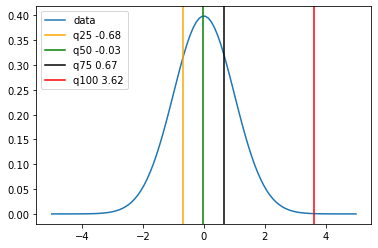

In [7]:
x = np.linspace(-5, 5, 100)
ax = plt.subplot()

#정규분포 데이터 만들기
dist = getattr(stats, 'norm')
data = dist.rvs(size=1000) 

#quntile 구하기
q25 = np.quantile(data, 0.25)
q50 = np.quantile(data, 0.50)
q75 = np.quantile(data, 0.75)
q100 = np.quantile(data, 1)

#pdf를 통해 data를 Probability density function 으로 바꿔그리기
y = dist.pdf(x)
ax.plot(x, y)
ax.axvline(q25, color='orange')
ax.axvline(q50, color='green')
ax.axvline(q75, color='black')
ax.axvline(q100, color='red')
ax.legend(['data','q25 {}'.format(round(q25,2)), 'q50 {}'.format(round(q50,2)), 'q75 {}'.format(round(q75,2)), 'q100 {}'.format(round(q100,2))])

In [8]:
df = pd.DataFrame(data)

In [9]:
df.quantile(q=0.1)

0   -1.339333
Name: 0.1, dtype: float64

* tsfresh로 quantile값 구해보기

In [10]:
df2 = df.copy()
df2['id'] = 0

In [11]:
settings = {'quantile': [{'q': 0.1},
  {'q': 0.2},
  {'q': 0.25},
  {'q': 0.3},
  {'q': 0.4},
  {'q': 0.5},
  {'q': 0.6},
  {'q': 0.7},
  {'q': 0.8},
  {'q': 0.9}]}

In [12]:
# compute the kurtosis using tsfresh
quantile = extract_features(df2, column_id='id', default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 239.26it/s]


In [13]:
quantile

,0__quantile__q_0.1,0__quantile__q_0.2,0__quantile__q_0.25,0__quantile__q_0.3,0__quantile__q_0.4,0__quantile__q_0.5,0__quantile__q_0.6,0__quantile__q_0.7,0__quantile__q_0.8,0__quantile__q_0.9
0,-1.339333,-0.891305,-0.678322,-0.524374,-0.236041,-0.03221,0.199644,0.494795,0.833031,1.233512


### Reference
* numpy  
https://numpy.org/doc/stable/reference/generated/numpy.quantile.html
* pandas  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
* tsfresh  
https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html#tsfresh.feature_extraction.feature_calculators.quantile
* blog  
https://sosomemo.tistory.com/34